In [27]:
%matplotlib inline

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
with open("heatmap.dat", "r") as fd:
    nrows, ncols = map(int, fd.readline().split())
    mat = np.ndarray((nrows, ncols))
    for i in range(nrows):
        line = fd.readline().split()
        for j in range(ncols):
            mat[i, j] = int(line[j])
    S1 = np.array(map(float, fd.readline().split()))
    S2 = np.array(map(float, fd.readline().split()))
    S3 = np.array(map(float, fd.readline().split()))
    S4 = np.array(map(float, fd.readline().split()))

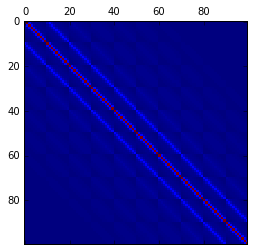

In [59]:
plt.matshow(mat/mat.max())
plt.show()

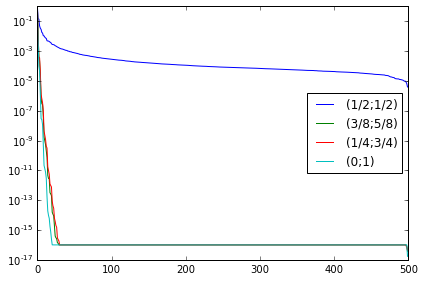

In [62]:
fig = plt.figure(111)
x = np.arange(S1.size)
plt.semilogy(x, S1/S1[0], label='(1/2;1/2)')
plt.semilogy(x, S2/S2[0], label='(3/8;5/8)')
plt.semilogy(x, S3/S3[0], label='(1/4;3/4)')
plt.semilogy(x, S4/S4[0], label='(0;1)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [39]:
mat[0,0]

500.0